# Мы будем анализировать набор данных Boston Houses, 
в котором объектами являются районы города, признаками — некие социальные и географические характеристики района, а целевой переменной — медианная стоимость домов в районе. Таким образом, мы будем решать задачу регрессии.

Как и в предыдущем практическом задании, весь код, который мы напишем, можно применить к любым данным.

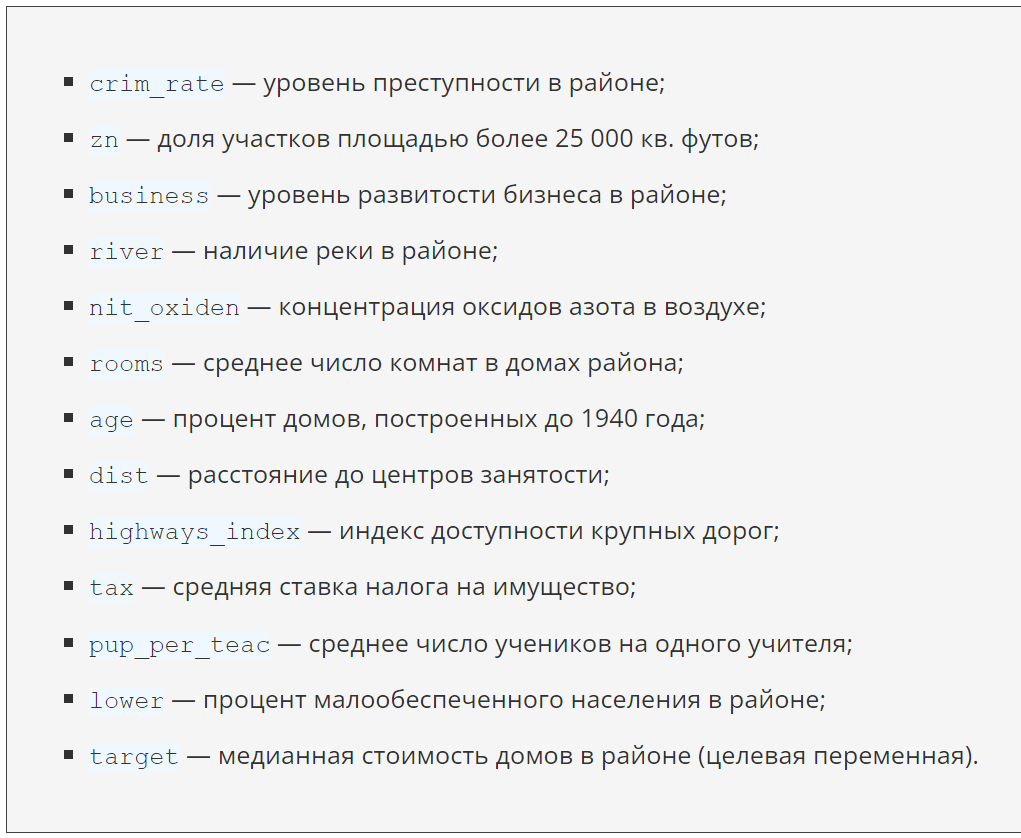

In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(transform_output='pandas')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_theme('notebook') 
sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8) 

In [99]:
df = pd.read_csv('data/boston.csv', decimal=',', thousands='.')
TARGET = 'target'

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crim_rate       506 non-null    float64
 1   zn              506 non-null    float64
 2   business        506 non-null    float64
 3   river           506 non-null    int64  
 4   nit_oxiden      506 non-null    float64
 5   rooms           506 non-null    float64
 6   age             506 non-null    float64
 7   dist            506 non-null    float64
 8   highways_index  506 non-null    int64  
 9   tax             506 non-null    int64  
 10  pup_per_teaс    506 non-null    float64
 11  lower           506 non-null    float64
 12  target          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [80]:
df

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [81]:
X, y = df.drop(columns=TARGET), df[TARGET]

### Задание 3.4

1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13.

Какое получилось среднее значение медианных цен на обучающей выборке? Ответ округлите до двух знаков после точки-разделителя.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

In [93]:
y_train.mean().round(2)

22.77

2. Обучите линейную регрессию с параметрами по умолчанию.

В качестве ответа введите ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [101]:
lr = LinearRegression()

In [102]:
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [103]:
print(f'MAE on test: {mean_absolute_error(y_test, y_test_pred):.2f}')

MAE on test: 3.72


3. Обучите решающее дерево с параметрами по умолчанию и аргументом random_state = 13.

Можно ли, опираясь на результаты, сделать вывод, что алгоритм переобучился?

In [97]:
trees = [3, 10, 100, 500]

In [98]:
for tr in trees:
    print('Trees ', tr)
    rfr = RandomForestRegressor(n_estimators=tr, random_state=13)
    rfr.fit(X_train, y_train)

    y_train_pred = rfr.predict(X_train)
    y_test_pred = rfr.predict(X_test)

    print(f'MAE on train: {mean_absolute_error(y_train, y_train_pred):.2f}')
    print(f'MAE on test: {mean_absolute_error(y_test, y_test_pred):.2f}')
    print()

Trees  3
MAE on train: 1.02
MAE on test: 2.93

Trees  10
MAE on train: 0.98
MAE on test: 2.47

Trees  100
MAE on train: 0.87
MAE on test: 2.26

Trees  500
MAE on train: 0.85
MAE on test: 2.24

